# Understanding the difference in the spectral density of Blackbody radiation vs Johnson noise

Black-body radiation describes the electromagnetic radiation emitted/absorbed by a mass due to thermal energy of the mass. Similarly, Johnson noise describes electrical noise generated by a disipative circuit element due to thermal energy of that element.

Both phenomenae come from the same mechanism: thermal energy generating random excitations; but if we look at the formulas for the energy spectrum in each phenomena, we have the following:

For *Black-body radiation* we use the spectral radiance from [Planck's law](https://en.wikipedia.org/wiki/Planck%27s_law#The_law)
$$B_f = \frac{2 h f^3}{c^2} \frac{1}{e^\frac{h f}{k_\mathrm{B} T} - 1}$$

For *Johnson-Nyquist noise* we have the [power spectral density](https://en.wikipedia.org/wiki/Johnson%E2%80%93Nyquist_noise#Quantum_effects_at_high_frequencies_or_low_temperatures)
$$S_f = 4 R h f \frac{1}{e^\frac{h f}{k_\mathrm{B} T} - 1}$$

Let's plot these two spectra at the same temperature. Note that they have different units, but the shape of the spectra represents the available photon energies; so we will normalise the plots to the max value to make the spectra easier to compare.

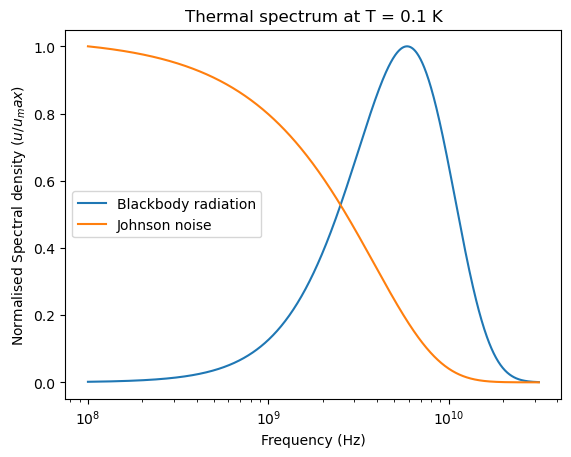

In [2]:
from scipy.constants import k, h, c
import numpy as np
import matplotlib.pyplot as plt

def planck_radiance(f, T):
    u = 2 * h * f**3 / c**2 / (np.exp(h * f / (k * T)) - 1)
    return u / np.max(u)

def johnson_psd(f, T):
    u = 4 * h * f / (np.exp(h* f / (k * T)) - 1)
    return u / np.max(u)

T = 0.1
# L = 0.1
f = np.logspace(8, 10.5, 1000)  # Frequency range from 1 THz to 1 PHz
plt.semilogx(f, planck_radiance(f, T), label='Blackbody radiation')
plt.semilogx(f, johnson_psd(f, T), label='Johnson noise')
# plt.axvline(c * np.sqrt(3) / (2 * L), color='g', linestyle='--', label=f'Lowest frequency mode of L = {L*100} cm')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalised Spectral density ($u / u_max$)')
plt.title(f'Thermal spectrum at T = {T} K')
plt.legend()

The difference in the spectra comes from the $f^3$ factor in Planck's law vs the $f$ factor in Johnson noise. At low frequencies, we can approximate to first order the Bose-Einstein term $1 / \left( e^{h f / k_\mathrm{B} T} - 1 \right) \approx k_\mathrm{B} T / h f$, which explains the constant(quadratic) spectrum of Johnson(Blackbody).

### If they both come from thermal fluctuations, why are the spectra so different?

The difference comes from the treatment of the medium through which the radiation travels and what does means in terms of the density of states that photons can occupy.

*Blackbody radiation* is derived for free space, where the number of modes available grow quadratically in k-space ($\propto$ frequency). We can get an intuition for this by recalling that for a particle in a box, the allowable wavevectors are $\vec{k} = \left( \frac{\pi n_x}{L}, \frac{\pi n_y}{L}, \frac{\pi n_z}{L} \right)$, with the particle energy being propotional to $|k| = \sqrt{n_x^2 + n_y^2 + n_z^2}$. Each combination of $n_{x,y,z}$ is a mode, and we can intuitively understand that there are more number of modes that will be degenerate as we increase $|k|$. When we formalise this theoretically, it turns out to be quadratic in $k$.

In contrast, *Johnson noise* is derived for noise travelling along a single-mode transmission line, so there is only one mode of propagation available independent of the frequency.

### What does this mean for qubits?

When thinking about the possible energies of photons that can reach the qubit from radiative sources, we need to consider where that radiation was originated, because the spectrum of photons coming from a warm shield will be different than that of photons radiating off a cable carrying johnson noise.